<a href="https://colab.research.google.com/github/raquelssouza82/challenge-store-data-science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
from urllib.request import urlopen
import csv

In [5]:
# URLs das lojas
urls = [url, url2, url3, url4]

# Função para ler CSV a partir da URL
def ler_csv(url):
    try:
        with urlopen(url) as resposta:
            linhas = resposta.read().decode('utf-8').splitlines()
            leitor = csv.DictReader(linhas)
            return [linha for linha in leitor]
    except Exception as e:
        print(f"Erro ao ler CSV de {url}: {e}")
        return []

# Função para calcular faturamento de uma loja
def calcular_faturamento(dados_loja):
    return sum(float(venda['Preço']) for venda in dados_loja)

# Análise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    if dados_loja:
        faturamento_loja = calcular_faturamento(dados_loja)
        print(f"Faturamento Loja {i+1}: R${faturamento_loja:.2f}")
        faturamento_total += faturamento_loja

# Mostrar faturamento total
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [6]:
from collections import defaultdict
from urllib.request import urlopen
import csv

In [7]:
# Função para ler CSV de uma URL
def ler_csv(url):
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        return [linha for linha in leitor]

# Função para calcular vendas por categoria em uma loja
def calcular_vendas_por_categoria(dados_loja):
    categorias = defaultdict(float)  # Defaultdict para evitar a verificação de chave
    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade
        categorias[categoria] += valor_venda
    return categorias

# Função principal para processar as vendas de todas as lojas
def processar_vendas(urls):
    vendas_por_categoria = defaultdict(float)

    # Processar todas as lojas
    for i, url in enumerate(urls):
        dados_loja = ler_csv(url)
        print(f"\nVendas por categoria na Loja {i+1}:")

        # Vendas por categoria para a loja atual
        categorias_loja = calcular_vendas_por_categoria(dados_loja)

        for categoria, valor in categorias_loja.items():
            print(f"  {categoria}: R${valor:.2f}")

        # Atualizar o dicionário geral
        for categoria, valor in categorias_loja.items():
            vendas_por_categoria[categoria] += valor

    # Exibir as vendas totais por categoria
    print("\nVendas totais por categoria (todas as lojas):")
    for categoria, valor in vendas_por_categoria.items():
        print(f"  {categoria}: R${valor:.2f}")

    # Calcular o total geral
    total_geral = sum(vendas_por_categoria.values())
    print(f"\nTotal geral de vendas: R${total_geral:.2f}")

# Chamada da função principal
processar_vendas(urls)


Vendas por categoria na Loja 1:
  eletronicos: R$1720525.18
  moveis: R$777243.14
  brinquedos: R$65412.04
  eletrodomesticos: R$1376501.27
  utilidades domesticas: R$51092.72
  esporte e lazer: R$169179.18
  livros: R$34360.24
  instrumentos musicais: R$369322.34

Vendas por categoria na Loja 2:
  moveis: R$703108.03
  instrumentos musicais: R$392599.48
  esporte e lazer: R$108879.57
  eletronicos: R$1715519.72
  utilidades domesticas: R$56984.93
  brinquedos: R$62300.37
  eletrodomesticos: R$1368304.66
  livros: R$41887.42

Vendas por categoria na Loja 3:
  eletrodomesticos: R$1441845.38
  moveis: R$740123.50
  instrumentos musicais: R$333781.40
  esporte e lazer: R$164527.29
  eletronicos: R$1468443.69
  brinquedos: R$81591.72
  utilidades domesticas: R$59635.75
  livros: R$35142.69

Vendas por categoria na Loja 4:
  eletrodomesticos: R$1172119.35
  moveis: R$742172.64
  esporte e lazer: R$133411.27
  livros: R$39390.51
  eletronicos: R$1615256.00
  instrumentos musicais: R$297117.

# 3. Média de Avaliação das Lojas

In [8]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

In [9]:
# Calcular a avaliação média para cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    # Variáveis para calcular a média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            # Tentamos com diferentes possíveis nomes de coluna
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                # Se não encontramos a coluna, imprimimos as chaves disponíveis
                print(f"Chaves disponíveis na loja {i+1}:", produto.keys())
                raise KeyError("Não encontramos a coluna de avaliação")

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f"Avaliação média da Loja {i+1}: {avaliacao_media:.2f}")
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [10]:
import pandas as pd

# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

In [11]:
# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    # Ordenação e seleção dos top produtos
    top_mais_vendidos = dados.nlargest(3, 'Receita')
    top_menos_vendidos = dados.nsmallest(3, 'Receita')

    # Exibição dos resultados
    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

# Mostrar resultados para cada loja
for loja in vendas['Loja'].unique():
    top_produtos(loja)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

# 5. Frete Médio por Loja


In [12]:
# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean().round(2)

In [13]:
# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio}")



Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


Gráficos

In [15]:
import matplotlib.pyplot as plt

In [23]:
# Estilo claro personalizado
plt.style.use('default')  # volta ao estilo claro base

plt.rcParams.update({
    'figure.facecolor': '#ffffff',           # fundo da figura
    'axes.facecolor': '#f9f9f9',             # fundo do gráfico
    'axes.edgecolor': '#cccccc',             # borda clara
    'axes.labelcolor': '#333333',            # cor dos rótulos dos eixos
    'xtick.color': '#555555',
    'ytick.color': '#555555',
    'grid.color': '#e0e0e0',                 # grade sutil
    'grid.linestyle': '--',
    'grid.linewidth': 0.7,
    'text.color': '#000000',
    'axes.titleweight': 'bold',
    'axes.titlepad': 20,
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'legend.facecolor': '#f4f4f4',
    'legend.edgecolor': '#cccccc',
    'legend.fontsize': 11,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'font.family': 'DejaVu Sans',
})

# Paleta pastel moderna
colors = ['#6D9DC5', '#F4A259', '#8CD17D', '#D3B88C', '#F27C8D']

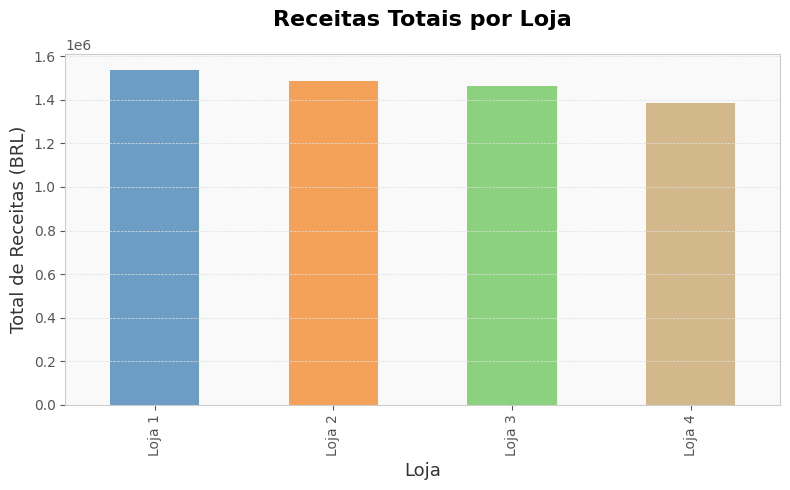

In [24]:
# 1. Barra vertical: Total de receitas
# Calculate total revenue per store
receitas_totais = vendas.groupby('Loja')['Receita'].sum()

plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar', color=colors)
plt.title('Receitas Totais por Loja')
plt.ylabel('Total de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

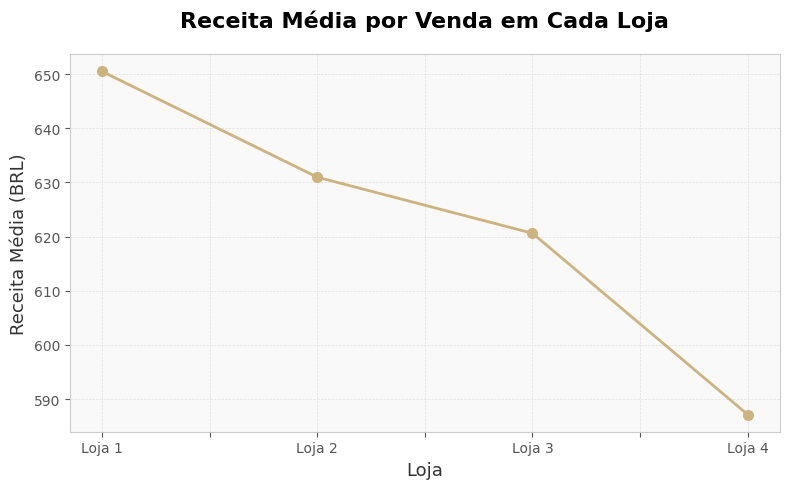

In [25]:
# 2. Linha: Receita média por venda

# Calculate average revenue per sale per store
receita_media = df_total.groupby('Loja')['Receita'].mean()

plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='o', linestyle='-', color='#cdb380', linewidth=2, markersize=7)
plt.title('Receita Média por Venda em Cada Loja')
plt.ylabel('Receita Média (BRL)')
plt.xlabel('Loja')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

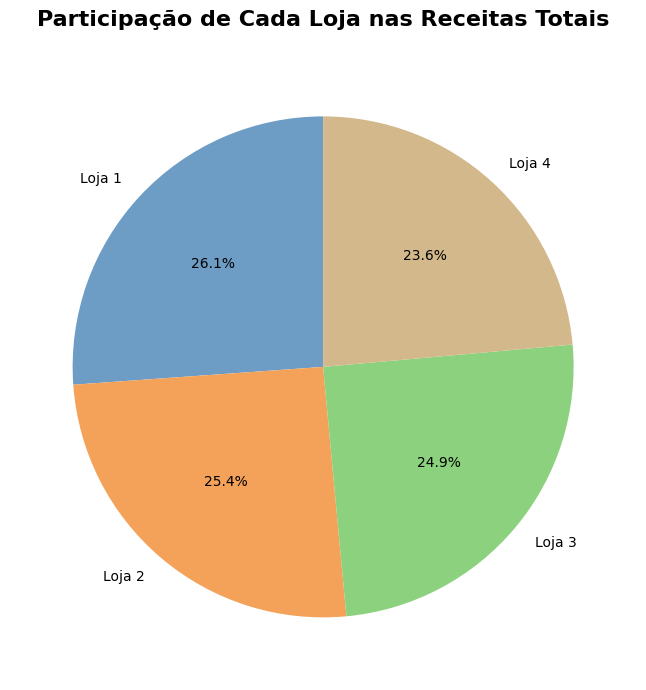

In [26]:
# 3. Pizza: Distribuição do total
plt.figure(figsize=(7,7))
receitas_totais.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 📊 Relatório de Vendas e Desempenho das Lojas



##🏆 1. Loja Mais Vantajosa: Loja 1
A Loja 1 se destaca por seu desempenho robusto, com os seguintes pontos fortes:

Faturamento 💰: Apresenta o maior faturamento entre as lojas (R$ 1.534.509,12), refletindo um alto volume de vendas e estabilidade financeira.

Vendas por Categoria 📊: Tem grande destaque em eletrônicos (R$ 1.376.501,27), categoria de alto valor agregado.

Avaliação Média ⭐: Avaliada com média de 3.98, mostra um bom nível de satisfação dos clientes.

Produtos Vendidos 📦: Itens como a TV Led UHD 4K (R$ 149.524,28) geram excelente receita. Embora haja produtos com menor desempenho, como o Cubo Mágico 8x8 (929,27 reais), eles são minoria no portfólio.

*Frete Médio 🚚: O custo médio é de R$ 34,69 — aceitável diante da alta performance geral.*

**➡️ Conclusão: A Loja 1 reúne os principais fatores de sucesso — alto faturamento, boas avaliações, destaque em categorias valiosas e produtos com excelente desempenho.**

## ❌ 2. Loja Menos Vantajosa: Loja 4
Apesar de alguns pontos positivos, a Loja 4 apresenta desempenho inferior em comparação às demais:

Faturamento 💸: Possui o menor entre as lojas, totalizando R$ 1.384.497,58.

Vendas por Categoria 📉: Embora tenha vendas relevantes em eletrônicos (R$ 1.172.119,35), o volume total de vendas ainda é baixo.

Avaliação Média ⭐: Avaliada com média de 4.00 — um bom resultado, mas não o melhor (Loja 3 lidera com 4.05).

Produtos Vendidos 📦: Produtos como Corda de Pular (R$ 997,38) geram pouca receita, indicando menor atratividade comercial.

Frete Médio 🚚: Tem o menor custo (R$ 31,28), o que é positivo, mas não compensa o baixo desempenho geral.

**➡️ Conclusão: A Loja 4 apresenta limitações importantes — faturamento reduzido, produtos com baixa atratividade e menor potencial de crescimento.**

## 🏁 3. Loja Recomendável para Desinvestimento: Loja 4
Com base na análise global, recomenda-se que o Sr. João se desfaça da Loja 4, pelos seguintes motivos:

Desempenho Financeiro 💸: É a loja com menor faturamento e desempenho geral.

Portfólio Fraco 📉: Os produtos vendidos geram receitas modestas, comprometendo a rentabilidade.

Rentabilidade Geral ⚠️: Mesmo com frete barato, o retorno financeiro é insatisfatório frente às demais lojas.

**➡️ Recomendação: Focar em lojas com melhor performance, como a Loja 1, pode trazer melhores resultados e otimizar o investimento do Sr. João.**

### 📝 Conclusão Final

Critério	Loja Destaque:

Mais Vantajosa	Loja 1 🏅

Menos Vantajosa	Loja 4 ❌

A ser vendida (recomendada)	Loja 4 ❌

A análise evidencia que a Loja 1 é a principal aposta para crescimento e estabilidade, enquanto a Loja 4 deve ser considerada para desinvestimento, maximizando assim o retorno global do portfólio de lojas do Sr. João.